# Workshop 3 - Exploratory Data Analysis (EDA)

This notebook demonstrates the Exploratory Data Analysis (EDA) workflow in practice based on the PorteSeguro's dataset for safe driver prediction, that is also one of the Kaggle's competition. The notebook consists of the following main sections:

1. [Setup Google Colab local drive ](#colab)
2. [Installing specific analysis packages](#install_packages)
3. [Loading analysis packages](#load_packages)
4. [Loading data](#load_data)
5. [Metadata](#metadata)
6. [Exploratory Data Analysis (EDA)](#eda)
    * [Data Quality Issues](#data_quality) 
    * [Univariate Exploration](#univariate_exploration) 
    * [Bivariate Exploration](#bivariate_exploration) 

# Setup Google Colab local drive <a name="colab"></a>

You may skip this section if you are working with Anaconda jupyter-notebook on your local computer

In [1]:
#Mounmting to you own Google Colab drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
#The jupyter-notebook and dataset should be first placed in your Google drive under the folder name "ML2021"
#The following command is meant to set the directory as the current, in which this notebook will load the datasset from.
%cd '/gdrive/MyDrive/ML2021'

/gdrive/MyDrive/ML2021


# Installing specific analysis packages <a name="install_packages"></a>

In [56]:
!pip install missingno
!pip install pandas-profiling
!pip install empiricaldist
!pip install factor-analyzer

# Loading analysis packages <a name="load_packages"></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

import missingno as msno
%matplotlib inline

pd.set_option('display.max_columns', 100)

<a name='load_data'></a>
# Loading data

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<a class="anchor" id="visual_inspection"></a>

# Data at first sight <a name='first_sight'></a>

Here is an excerpt of the the data description for the competition:
* Features that belong to **similar groupings are tagged** as such in the feature names (e.g.,  ind, reg, car, calc).
* Feature names include the postfix **bin** to indicate binary features and **cat** to  indicate categorical features. 
* Features **without these designations are either continuous or ordinal**. 
* Values of **-1**  indicate that the feature was **missing** from the observation. 
* The **target** columns signifies whether or not a claim was filed for that policy holder.

Ok, that's important information to get us started. Let's have a quick look at the first and last rows to confirm all of this.

In [6]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [7]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


Observation:
* binary variables
* categorical variables of which the category values are integers
* other variables with integer or float values
* variables with -1 representing missing values

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

Observation:
* with the info() method, we see that the data type is integer or float
* No null values are present in the data set. That's normal because missing values are replaced by -1

Let's look at the number of rows and columns in the train data.

In [9]:
print("Train dataset (rows, cols):",train.shape, "\nTest dataset (rows, cols):",test.shape)

Train dataset (rows, cols): (595212, 59) 
Test dataset (rows, cols): (892816, 58)


We can build data profile using **pandas_profiling**

In [10]:
#import pandas_profiling as pdp

In [11]:
#profile_train_df = pdp.ProfileReport(train, 
#                                      minimal = True, 
#                                      # Deals with large datasets
#                                      explorative=True, 
#                                      # includes many features for text 
#                                      title = 'ProfilingResults',
#                                      progress_bar=True)



In [12]:
#profile_train_df

# Metadata <a name='metadata'></a>

In [13]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [14]:
data = []
for feature in train.columns:
    # Defining the role
    if feature == 'target':
        role = 'target'
    elif feature == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in feature or feature == 'target':
        level = 'binary'
    elif 'cat' in feature or feature == 'id':
        level = 'nominal'
    elif train[feature].dtype == float:
        level = 'interval'
    else:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if feature == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[feature].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    feature_dict = {
        'varname': feature,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(feature_dict)
    
meta1 = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta1.set_index('varname', inplace=True)
meta1

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [15]:
data = []
for feature in train.columns:
    # Defining the role
    if feature == 'target':
        use = 'target'
    elif feature == 'id':
        use = 'id'
    else:
        use = 'input'
         
    # Defining the type
    if 'bin' in feature or feature == 'target':
        type = 'binary'
    elif 'cat' in feature or feature == 'id':
        type = 'categorical'
    elif train[feature].dtype == float or isinstance(train[feature].dtype, float):
        type = 'real'
    else:
        type = 'integer'
        
    # Initialize preserve to True for all variables except for id
    preserve = True
    if feature == 'id':
        preserve = False
    
    # Defining the data type 
    dtype = train[feature].dtype
    
    category = 'none'
    # Defining the category
    if 'ind' in feature:
        category = 'individual'
    elif 'reg' in feature:
        category = 'registration'
    elif 'car' in feature:
        category = 'car'
    elif 'calc' in feature:
        category = 'calculated'
    
    
    # Creating a Dict that contains all the metadata for the variable
    feature_dictionary = {
        'varname': feature,
        'use': use,
        'type': type,
        'preserve': preserve,
        'dtype': dtype,
        'category' : category
    }
    data.append(feature_dictionary)
    
meta2 = pd.DataFrame(data, columns=['varname', 'use', 'type', 'preserve', 'dtype', 'category'])
meta2.set_index('varname', inplace=True)
meta2

,use,type,preserve,dtype,category
varname,,,,,
id,id,categorical,False,int64,none
target,target,binary,True,int64,none
ps_ind_01,input,integer,True,int64,individual
ps_ind_02_cat,input,categorical,True,int64,individual
ps_ind_03,input,integer,True,int64,individual
ps_ind_04_cat,input,categorical,True,int64,individual
ps_ind_05_cat,input,categorical,True,int64,individual
ps_ind_06_bin,input,binary,True,int64,individual
ps_ind_07_bin,input,binary,True,int64,individual


We can extract, for example, all categorical values:

In [16]:
meta2[(meta2.type == 'categorical') & (meta2.preserve)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

Let's inspect all features, to see how many category distinct values do we have:

In [17]:
pd.DataFrame({'count' : meta2.groupby(['category'])['category'].size()}).reset_index()

,category,count
0,calculated,20
1,car,16
2,individual,18
3,none,2
4,registration,3


In [18]:
pd.DataFrame({'count' : meta2.groupby(['use', 'type'])['use'].size()}).reset_index()

,use,type,count
0,id,categorical,1
1,input,binary,17
2,input,categorical,14
3,input,integer,16
4,input,real,10
5,target,binary,1


# Exploratory Data Analysis (EDA) <a name='eda'></a>

## Data Quality Issues <a name='data_quality'></a>

### Data duplications

In [57]:
train.drop_duplicates()
train.shape

(595212, 59)

In [58]:
test.drop_duplicates()
test.shape

(892816, 58)

Observations:
* **Train** has 595,212 rows and 59 variables
* 1 one missing variable in the **Test** (58 variables) 
* no duplication in both **Train** and **Test** dataset

### Missing Values
Missing values represented by -1 can be replaced with NaN. Most of the classifiers have pretty good strategies to manage missing (or NaN) values.

In [59]:
def _impute_missing_data(data):
    return data.replace(-1, np.nan)

train = _impute_missing_data(train)
test = _impute_missing_data(test)

In [60]:
print('NaN values =', train.isnull().sum().sum())
print("""""")

vars_with_missing = []

for feature in train.columns:
    missings = train[feature].isna().sum()
    
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

NaN values = 846458

Variable ps_ind_02_cat has 216 records (0.04%) with missing values.
Variable ps_ind_04_cat has 83 records (0.01%) with missing values.
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values.
Variable ps_reg_03 has 107772 records (18.11%) with missing values.
Variable ps_car_01_cat has 107 records (0.02%) with missing values.
Variable ps_car_02_cat has 5 records (0.00%) with missing values.
Variable ps_car_03_cat has 411231 records (69.09%) with missing values.
Variable ps_car_05_cat has 266551 records (44.78%) with missing values.
Variable ps_car_07_cat has 11489 records (1.93%) with missing values.
Variable ps_car_09_cat has 569 records (0.10%) with missing values.
Variable ps_car_11 has 5 records (0.00%) with missing values.
Variable ps_car_12 has 1 records (0.00%) with missing values.
Variable ps_car_14 has 42620 records (7.16%) with missing values.
In total, there are 13 variables with missing values


We can use **missingno** package to visualise the missing values. To do that, we must first replace the -1 values into NAN value, then use  missingno.
Note: if missingno has not been previously installed, you can install it using the following command within Jupyter-notebook: 
**!pip install missingno**

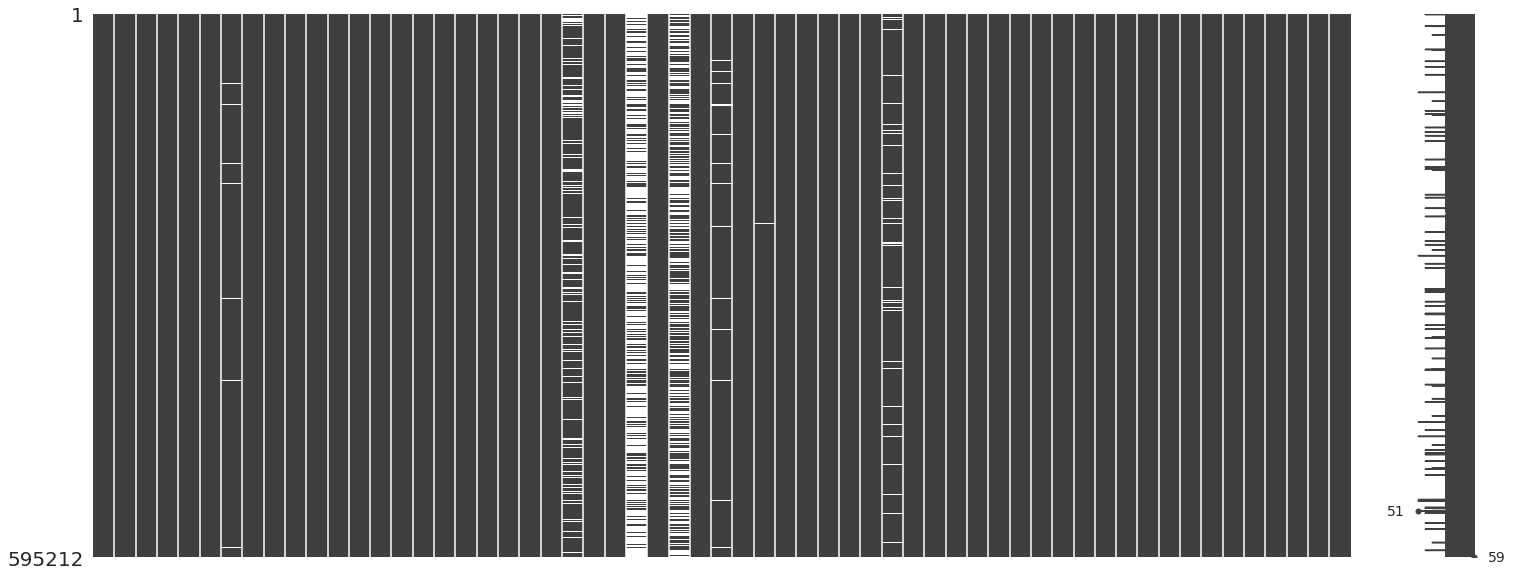

In [61]:
import missingno as msno  # Visualize missing values
%matplotlib inline
msno.matrix(train)

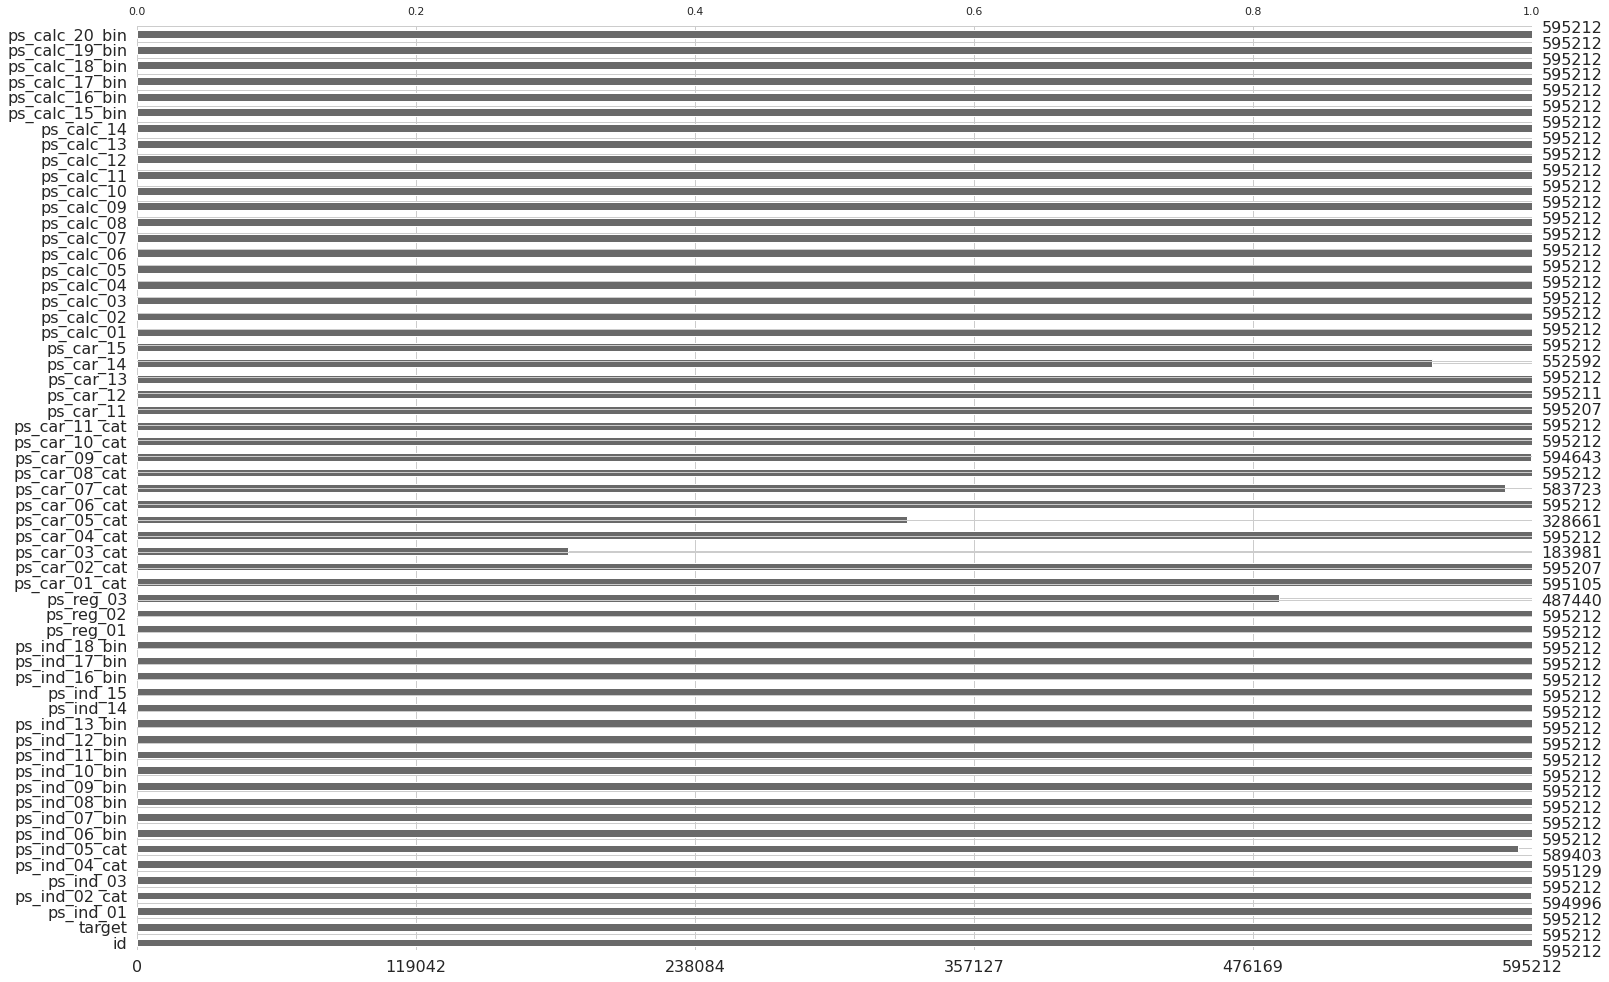

In [62]:
msno.bar(train);

Observations:
- **ps_car_03_cat and ps_car_05_cat** have a large proportion of  records with missing values. Remove these variables.
- For the other categorical variables with missing values, we can leave the missing value -1 as such.
- **ps_reg_03** (real/interval) has missing values for 18% of all records. Replace by the mean.
- **ps_car_11** (categorical/ordinal) has only 5 records with misisng values. Replace by the mode.
- **ps_car_12** (real/interval) has only 1 records with missing value. Replace by the mean.
- **ps_car_14** (real/interval) has missing values for 7% of all records. Replace by the mean.

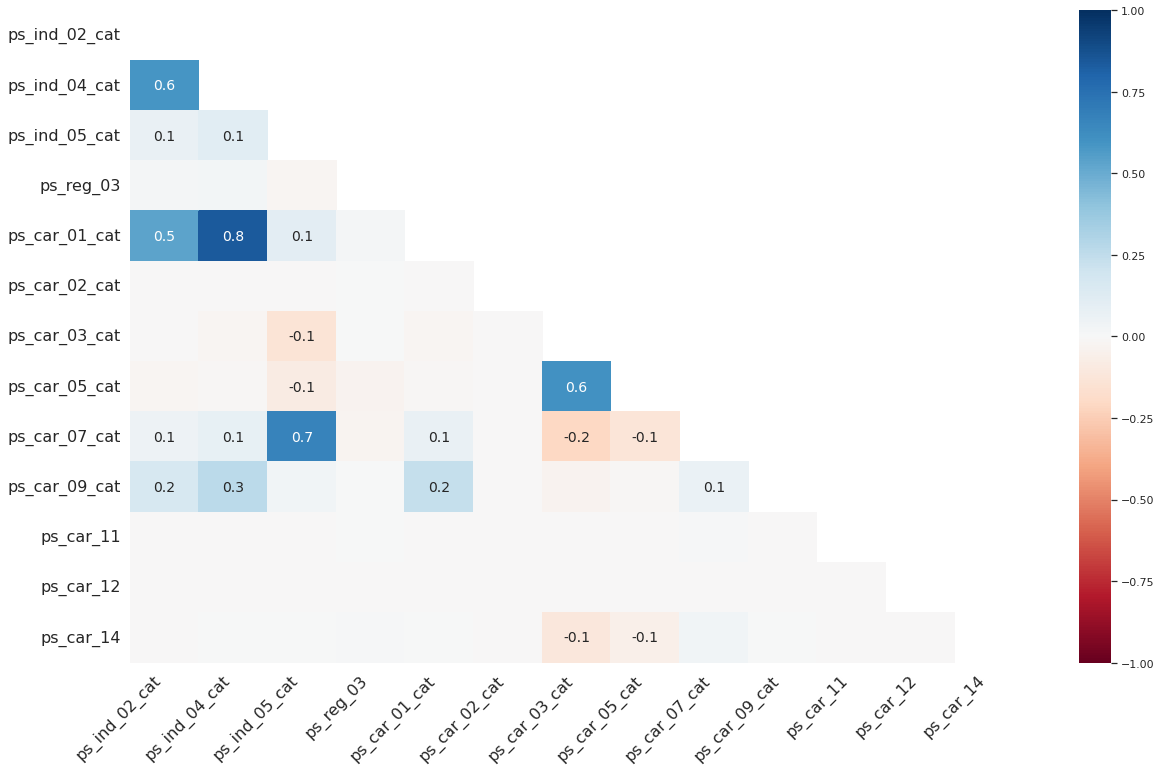

In [63]:
msno.heatmap(train)

Observations:
- **ps_ind_01_cat/ps_ind_02_cat/ps_ind_04_cat** have the same missing values 
- missing value relationship between **ps_car_03_cat/ps_ind_02_cat** seems very similar to **ps_car_03_cat/ps_ind_04_cat**
- missing value relationship between **ps_car_07_cat/ps_ind_02_cat** seems very similar to **ps_car_07_cat/ps_ind_04_cat** and **ps_car_07_cat/ps_car_01_cat and ps_ind_05_cat/ps_ind_02_cat** and **ps_ind_05_cat/ps_ind_04_cat** 
- Negative relationships may suggest imputational opportunities are they signify cases where missing values exist in one variable but not in another 

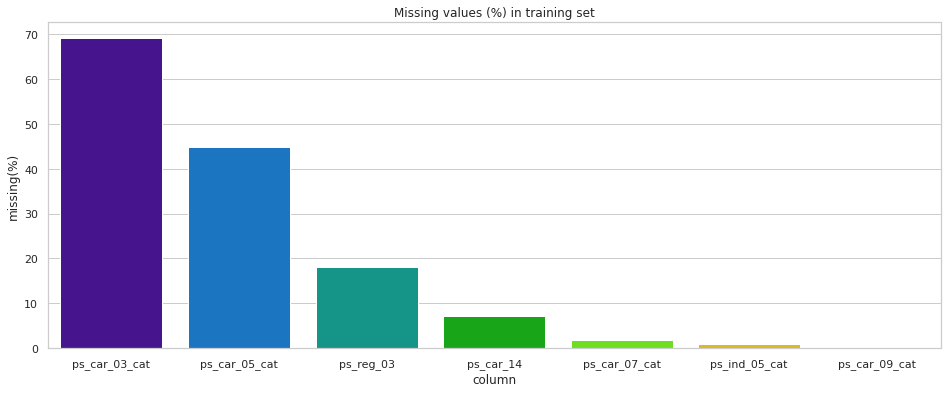

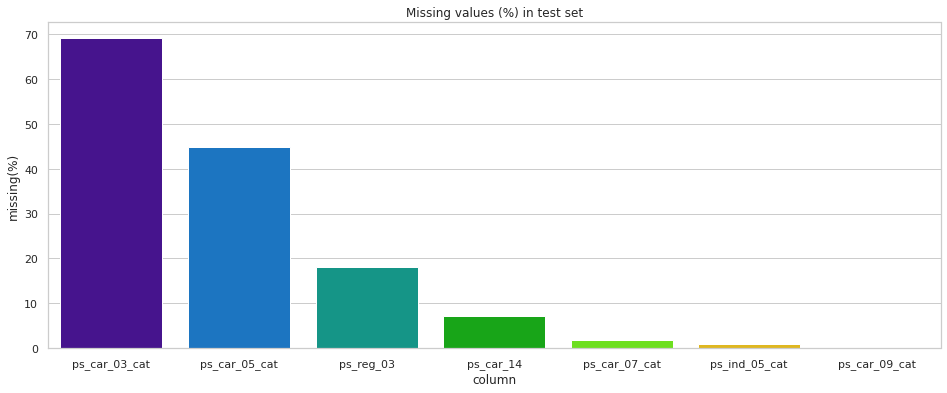

In [64]:
df_missing_train = pd.DataFrame({'column':train.columns, 'missing(%)':((train.isna()).sum()/train.shape[0])*100})
df_missing_test = pd.DataFrame({'column':train.columns, 'missing(%)':((train.isna()).sum()/train.shape[0])*100})

df_missing_train_nl = df_missing_train.nlargest(7, 'missing(%)')
df_missing_test_nl = df_missing_test.nlargest(7, 'missing(%)')

sns.set_palette(sns.color_palette('nipy_spectral'))

plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_train_nl, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in training set')
plt.show()

plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_test_nl, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in test set')
plt.show()

Observations: Missing value proportions tend to be consistent across the **train** and **test** dataset

## Univariate Exploration <a name='univariate_exploration'></a>

### Binary features

Let's plot the histogram of **target** column within the **train** dataset

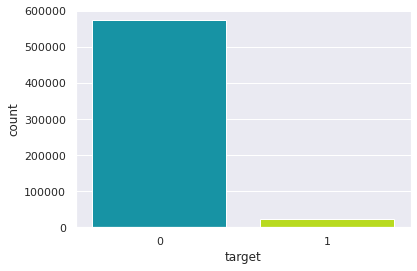

In [65]:
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=train['target'],palette='nipy_spectral')
plt.show()

 Let's obtain get the descriptive the binary features within the  **train** dataset

In [66]:
v = meta2[(meta2.type == 'binary') & (meta2.preserve)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations:

- The mean value of **target** in the **train** dataset is 3.6448%, which is **strongly imbalanced** between zeros and ones.
- From the means we can conclude that for most variables the value is zero in most cases.

Let's plot the distribution of the binary data in the **train** dataset,  with **blue** represent the percent of 0, and the **red** represent the percent of 1

<Figure size 432x288 with 0 Axes>

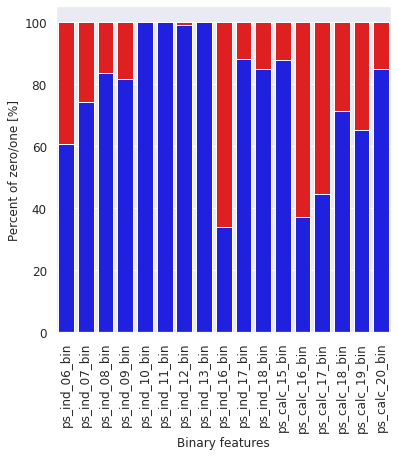

In [67]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum()/train.shape[0]*100)
    one_list.append((train[col]==1).sum()/train.shape[0]*100)
plt.figure()
fig, ax = plt.subplots(figsize=(6,6))
# Bar plot
p1 = sns.barplot(ax=ax, x=bin_col, y=zero_list, color="blue")
p2 = sns.barplot(ax=ax, x=bin_col, y=one_list, bottom= zero_list, color="red")
plt.ylabel('Percent of zero/one [%]', fontsize=12)
plt.xlabel('Binary features', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

Observations: **ps_ind_10_bin**, **ps_ind_11_bin**, **ps_ind_12_bin** and **ps_ind_13_bin** have very small number of values 1 (lesss than 0.5%) whilst the number of value 1 is very large for **ps_ind_16_bin** and **ps_cals_16_bin** (more than 60%).



Let's see the distribution of **binary** variables and the corresponding values of **target** variable.

<Figure size 432x288 with 0 Axes>

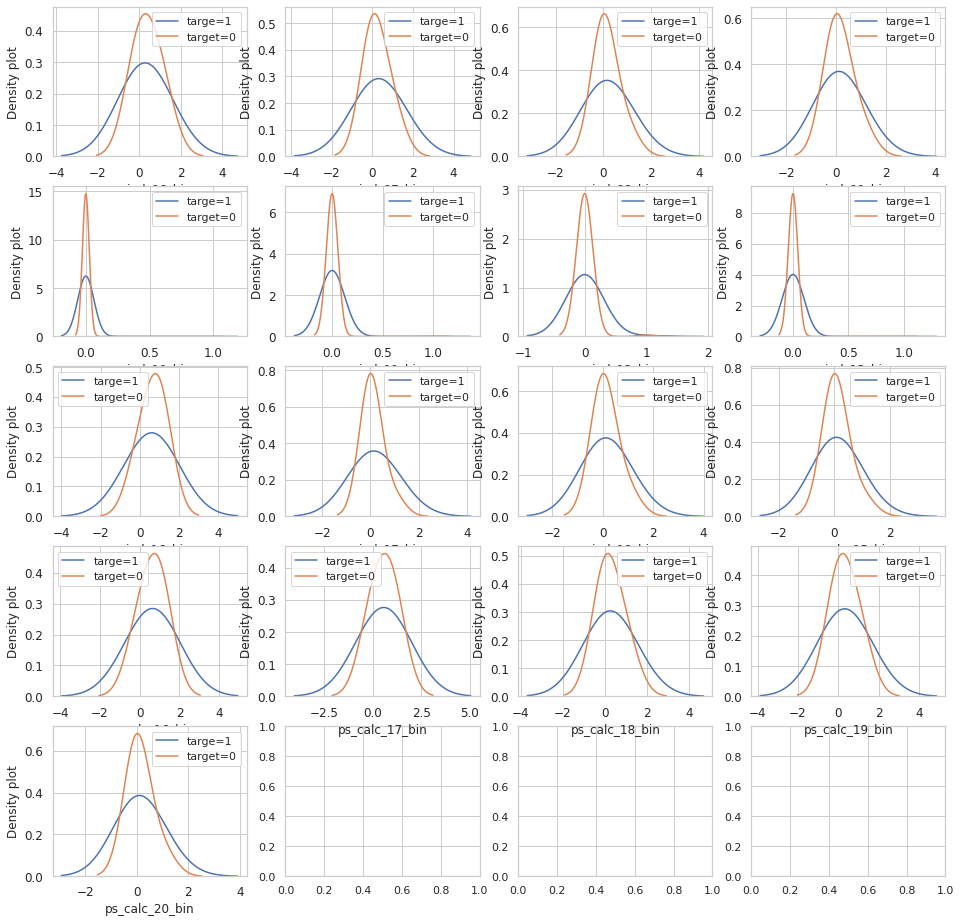

In [68]:
var = meta2[(meta2.type == 'binary') & (meta2.preserve)].index
var = [col for col in train.columns if '_bin' in col]
i = 0
t1 = train.loc[train['target'] != 0]
t0 = train.loc[train['target'] == 0]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,4,figsize=(16,16))

for feature in var:
    i += 1
    plt.subplot(5,4,i)
    sns.kdeplot(t1[feature], bw_adjust=20)
    sns.kdeplot(t0[feature], bw_adjust=20)
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(['targe=1', 'target=0'], loc='best')
plt.show();

### Categorical (Nominal) features

Let's see the distribution of **categorical** variables and the corresponding values of **target** variable.

<Figure size 432x288 with 0 Axes>

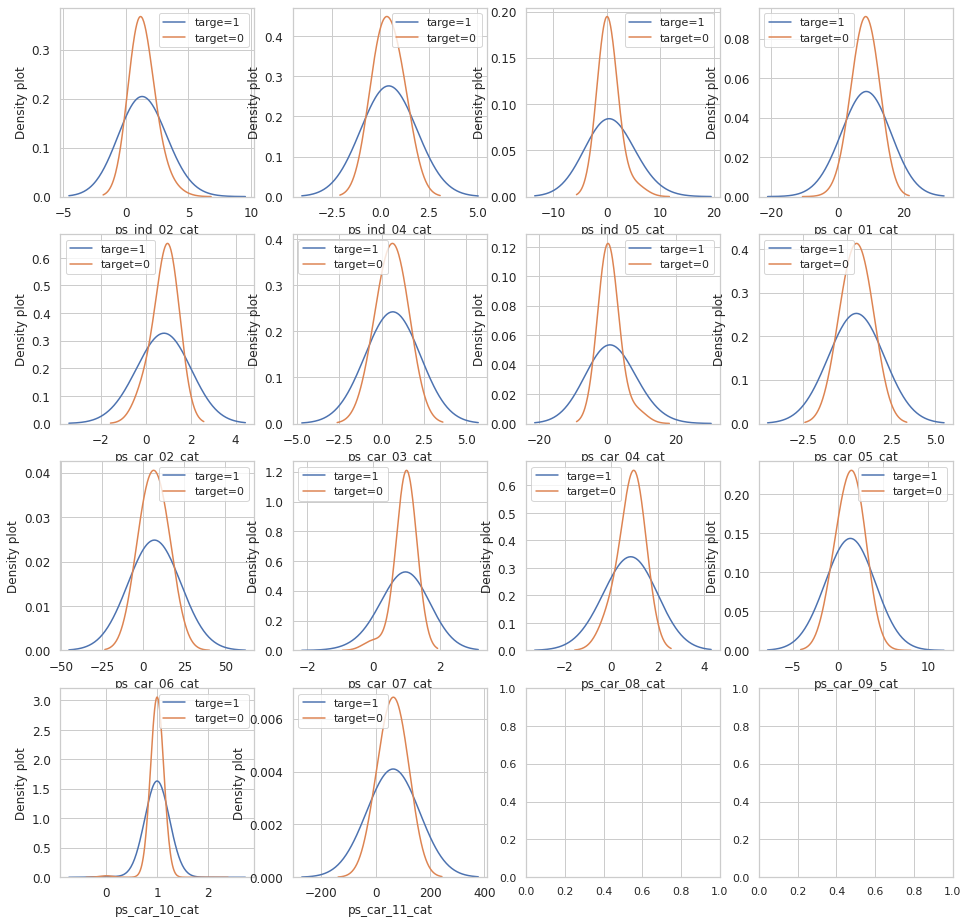

In [69]:
var = meta2[(meta2.type == 'categorical') & (meta2.preserve)].index
i = 0
t1 = train.loc[train['target'] != 0]
t0 = train.loc[train['target'] == 0]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(4,4,figsize=(16,16))

for feature in var:
    i += 1
    plt.subplot(4,4,i)
    sns.kdeplot(t1[feature], bw_adjust=20)
    sns.kdeplot(t0[feature], bw_adjust=20)
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(['targe=1', 'target=0'], loc='best')
plt.show();

We calculate the percentage of target=1 per category value and represent these percentages using bar plots (histogram).

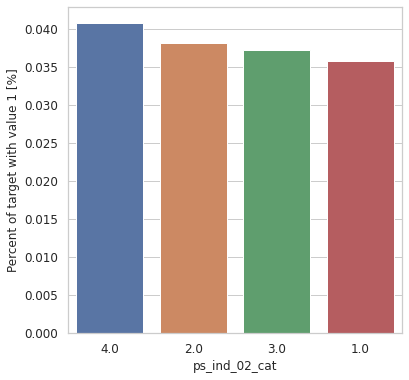

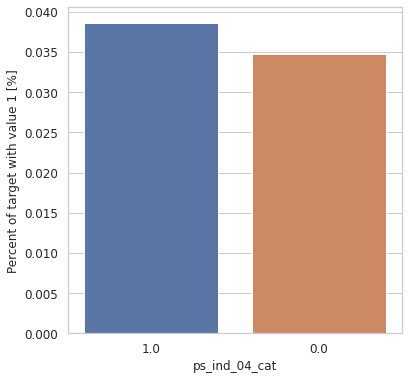

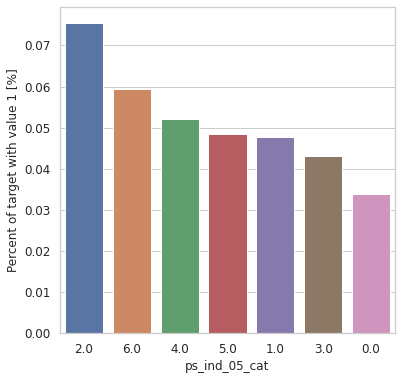

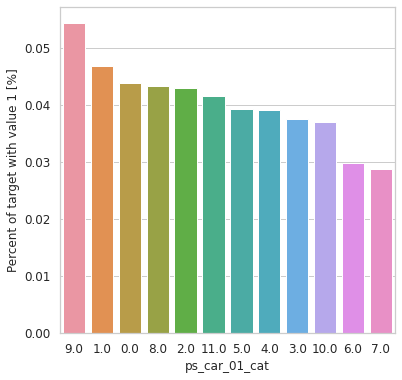

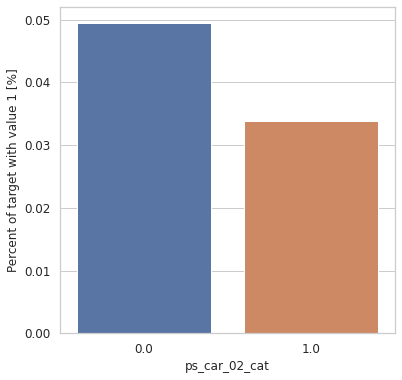

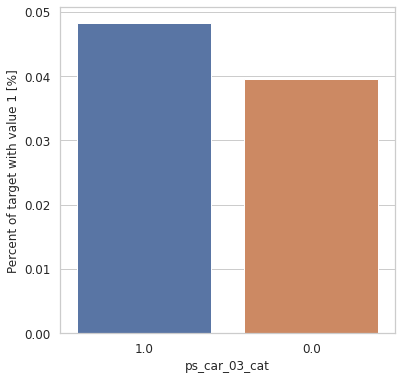

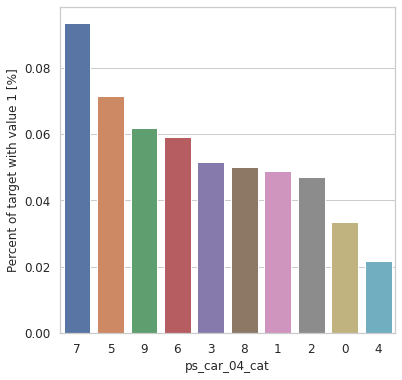

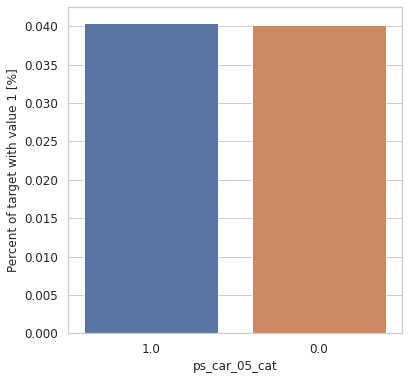

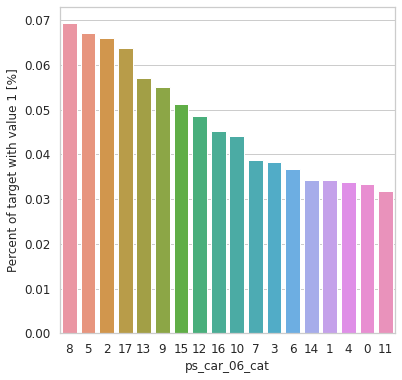

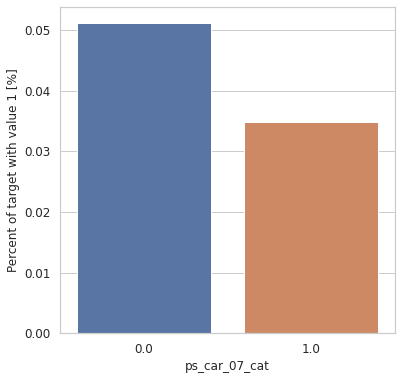

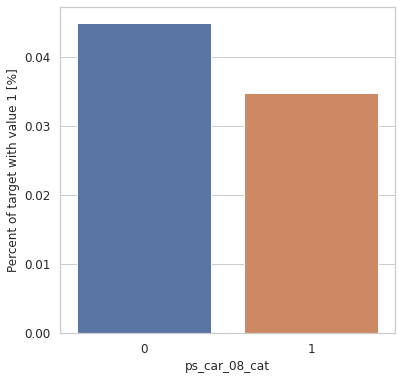

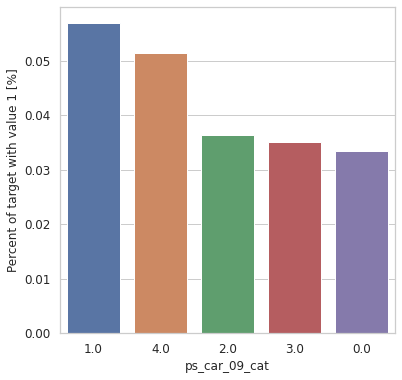

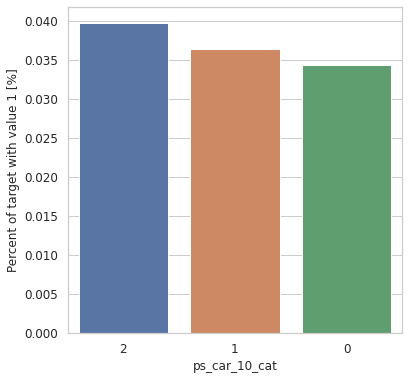

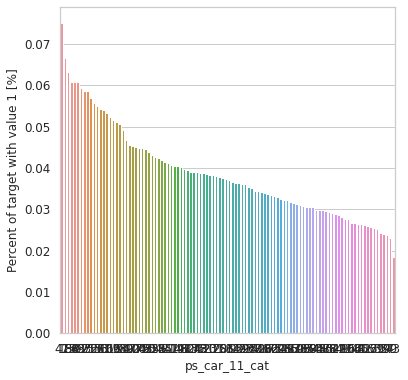

In [70]:
var = meta2[(meta2.type == 'categorical') & (meta2.preserve)].index

for feature in var:
    fig, ax = plt.subplots(figsize=(6,6))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, 'target']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax,x=feature, y='target', data=cat_perc, order=cat_perc[feature])
    plt.ylabel('Percent of target with value 1 [%]', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

Here, we check the cardinality of the categorical variables. Cardinality refers to the number of different values in a variable. 

In [71]:
var = meta2[(meta2.type == 'categorical') & (meta2.preserve)].index

for feature in var:
    dist_values = train[feature].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(feature, dist_values))

Variable ps_ind_02_cat has 4 distinct values
Variable ps_ind_04_cat has 2 distinct values
Variable ps_ind_05_cat has 7 distinct values
Variable ps_car_01_cat has 12 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_03_cat has 2 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_05_cat has 2 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 2 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 5 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


Observations: Only **ps_car_11_cat** has many distinct values, although it is still reasonable.

### Real (Interval) features

In [72]:
variable = meta2[(meta2.type == 'real') & (meta2.preserve)].index
train[variable].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,487440.000000,595211.000000,595212.000000,552592.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.894047,0.379947,0.813265,0.374691,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.345413,0.058300,0.224588,0.045610,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,0.061237,0.100000,0.250619,0.109545,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.633443,0.316228,0.670867,0.350428,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.801561,0.374166,0.765811,0.373497,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.083974,0.400000,0.906190,0.398121,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


Observation:

**reg**: The range (min to max) differs between the variables. We could apply scaling (e.g. StandardScaler), but it depends on the classifier we will want to use

**car**: Again, the range differs and we could apply scaling

**calc**: This seems to be some kind of ratio as the maximum is 0.9. All three *_calc* variables have very similar distributions

**Overall**, we can see that the range of the interval variables is rather small. Perhaps some transformation (e.g. log) is already applied in order to anonymise the data?


## Bivariate Exploration <a name='bivariate_exploration'></a>

### Real (Interval) features

Let's visualise the relationship between features in the Real (Interval) variables using Correlation 
Matrix

In [73]:
def corr_heatmap(sample, masking=False):
    sns.set_style('whitegrid')
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(50, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(10,10))
    
    if masking==False:
        correlations = sample.corr()
        sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f', 
                    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    else:
        correlations = np.triu(sample.corr())
        sns.heatmap(sample.corr(), cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75}, 
                    mask=correlations)
    plt.show();    

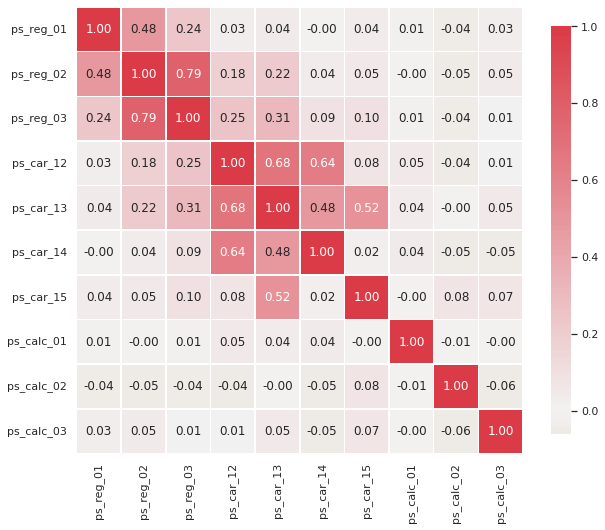

In [74]:
sample = train.sample(1000)
var = meta2[(meta2.type == 'real') & (meta2.preserve)].index
sample = sample[var]
corr_heatmap(sample)

Observations - The variables with strong correlations are:
- ps_reg_02 and ps_reg_03
- ps_car_12 and ps_car13
- ps_car_12 and ps_car14
- ps_car_13 and ps_car15

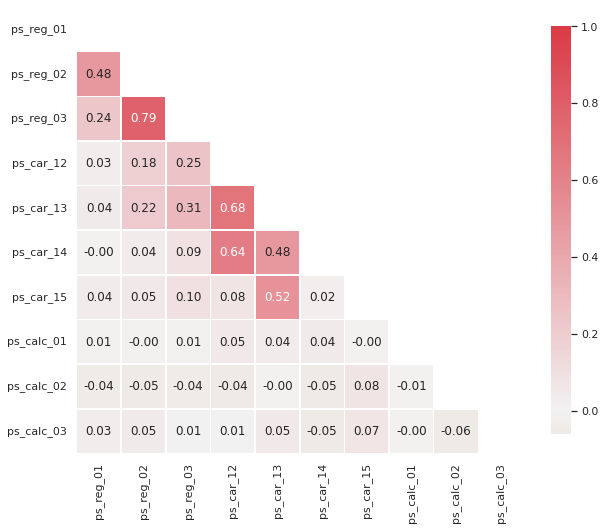

In [75]:
corr_heatmap(sample, masking=True)

Let's visualise the features with strong correlations in the Real (Interval) variables using Pairplot 

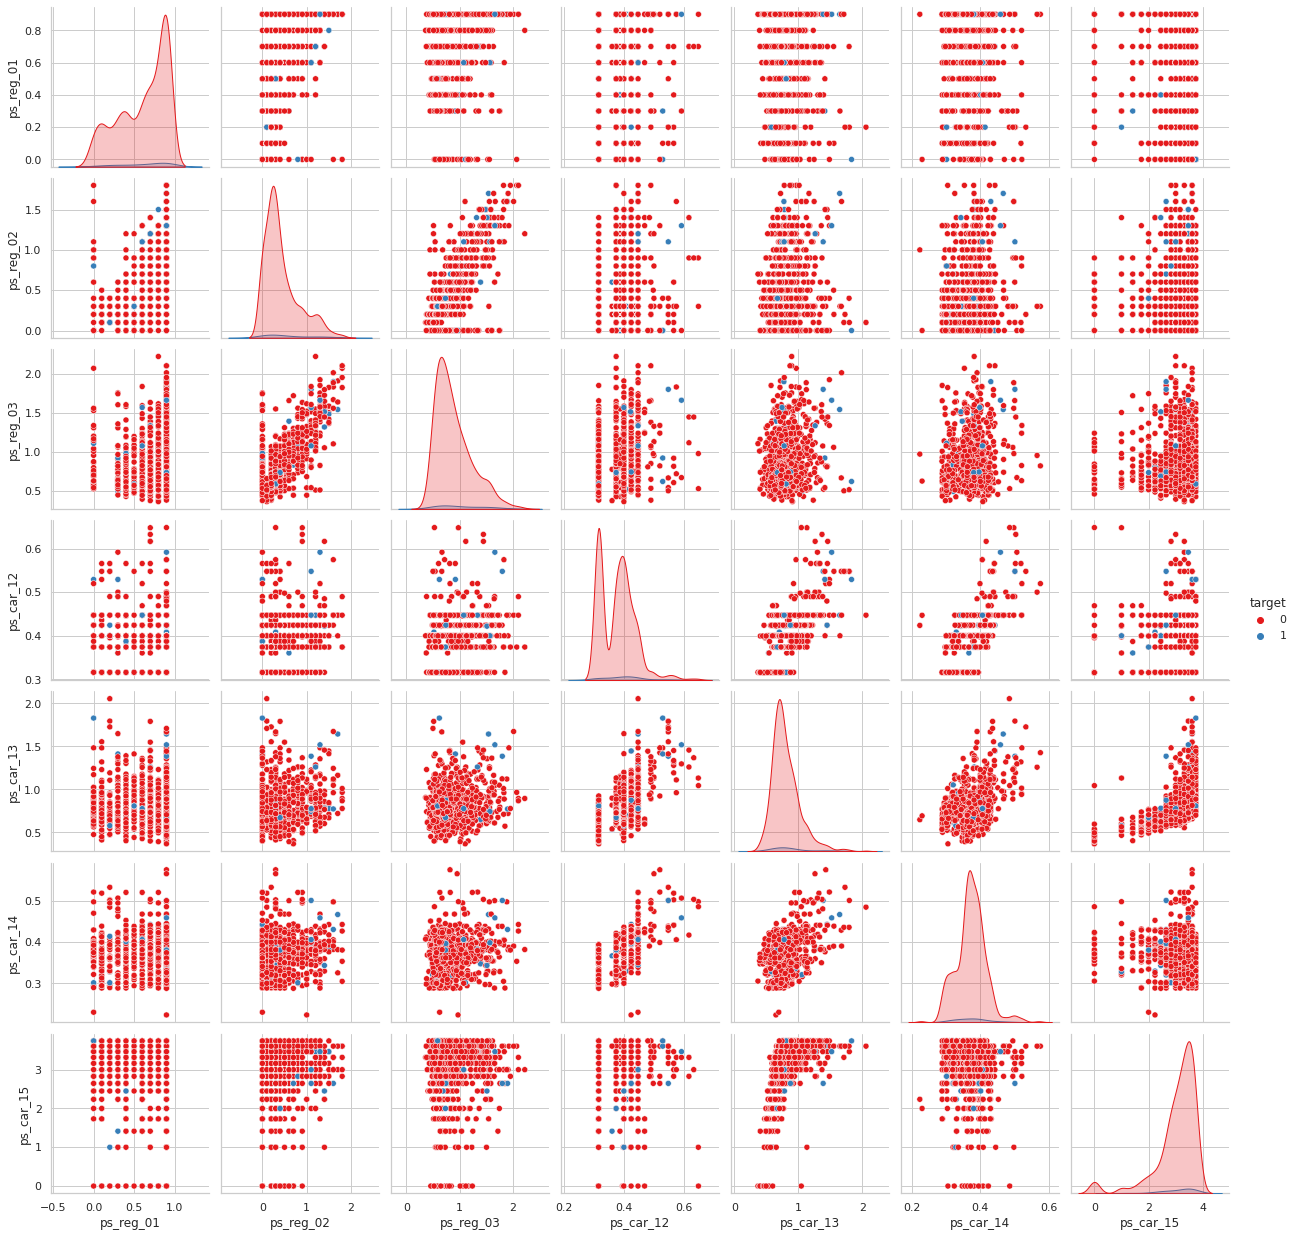

In [76]:
sample = train.sample(1000)
var = ['ps_reg_01', 'ps_reg_02', 
       'ps_reg_03', 'ps_car_12', 
       'ps_car_13', 'ps_car_14',
       'ps_car_15', 'target']
sample = sample[var]
sns.pairplot(sample,  hue='target', 
             palette = 'Set1', diag_kind='kde')
plt.show()

Let's visualise the correlation between 2 specific features in the Real (Interval) variables using linear model plot (lmplot)

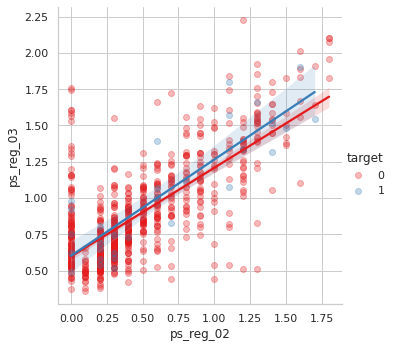

In [77]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=sample, 
           hue='target', palette='Set1', 
           scatter_kws={'alpha':0.3})
plt.show()

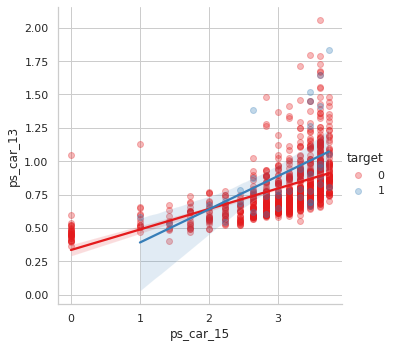

In [78]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=sample, 
           hue='target', palette='Set1', 
           scatter_kws={'alpha':0.3})
plt.show()

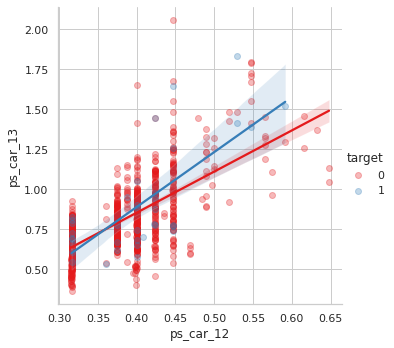

In [79]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=sample, 
           hue='target', palette='Set1', 
           scatter_kws={'alpha':0.3})
plt.show()

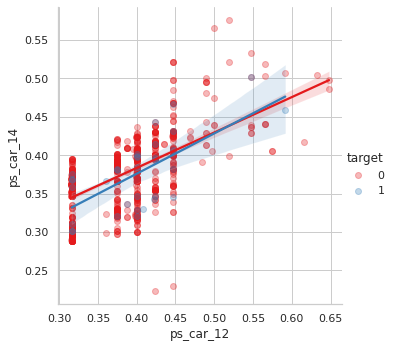

In [80]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=sample, 
           hue='target', palette='Set1', 
           scatter_kws={'alpha':0.3})
plt.show()

Let's visualise the correlation between 2 specific features in the Real (Interval) variables using Joint-Plot

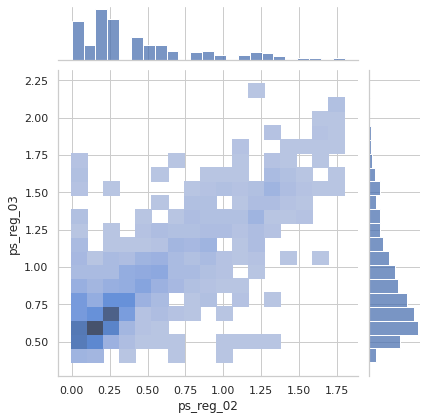

In [81]:
sns.jointplot(x='ps_reg_02', y='ps_reg_03', data=sample, 
              kind="hist")

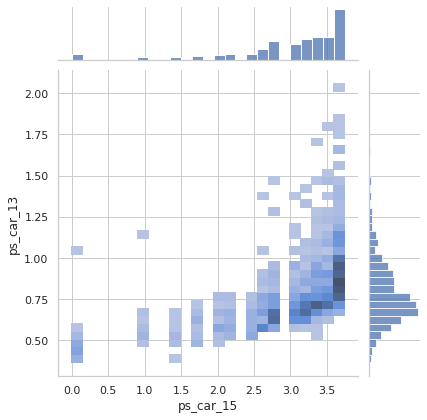

In [82]:
sns.jointplot(x='ps_car_15', y='ps_car_13', data=sample, 
              kind="hist")

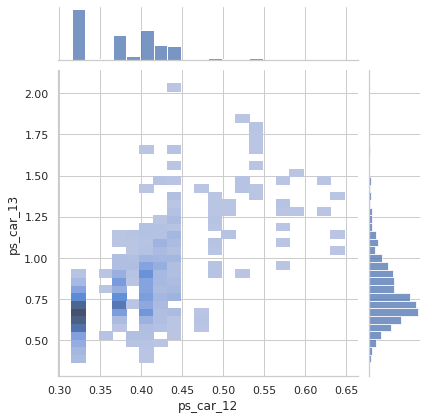

In [83]:
sns.jointplot(x='ps_car_12', y='ps_car_13', data=sample, 
              kind="hist")

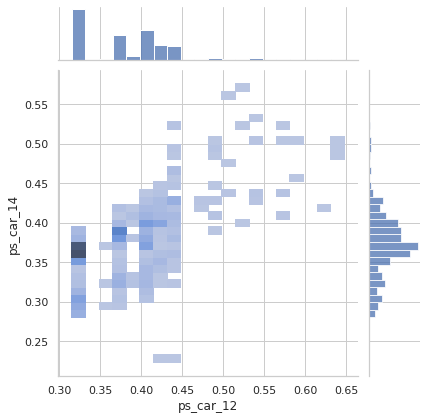

In [84]:
sns.jointplot(x='ps_car_12', y='ps_car_14', data=sample, 
              kind="hist")

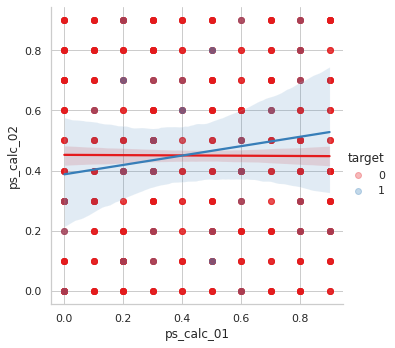

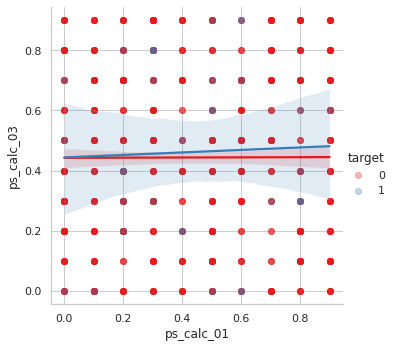

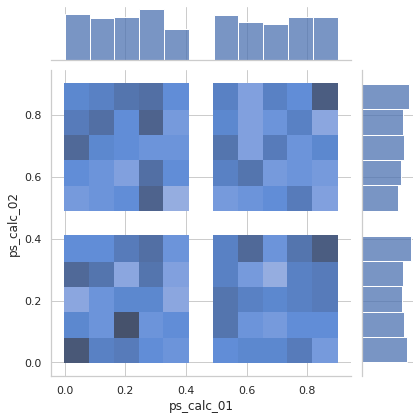

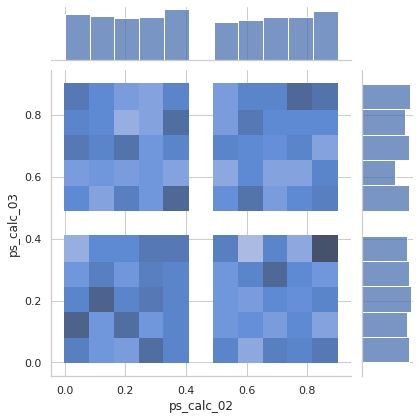

In [85]:
sample_nc = train.sample(1000)
var_nc = ['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'target']
sample_nc = sample_nc[var_nc]

sns.lmplot(x='ps_calc_01', y='ps_calc_02', data=sample_nc, 
           hue='target', palette='Set1', scatter_kws={'alpha':0.3})
sns.lmplot(x='ps_calc_01', y='ps_calc_03', data=sample_nc, 
           hue='target', palette='Set1', scatter_kws={'alpha':0.3})

sns.jointplot(x='ps_calc_01', y='ps_calc_02', data=sample_nc, kind="hist")
sns.jointplot(x='ps_calc_02', y='ps_calc_03', data=sample_nc, kind="hist")

plt.show()

Question: How can we decide which of the correlated variables to keep?

### Integer (Ordinal) features

Let's visualise the relationship between features in the Integer (Ordinal) variables using Correlation Matrix


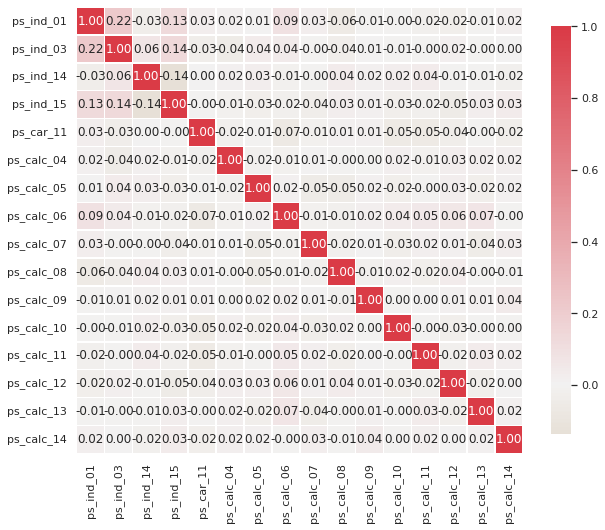

In [86]:
sample = train.sample(1000)
var = meta2[(meta2.type == 'integer') & (meta2.preserve)].index
sample = sample[var]
corr_heatmap(sample)

Observations: For the *integer* variables we do not see many correlations.

In [87]:
def corr_heatmap1(sample, method):
    sns.set_style('whitegrid')
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(50, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(10,10))
    correlations = sample.corr(method)
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f', 
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();    

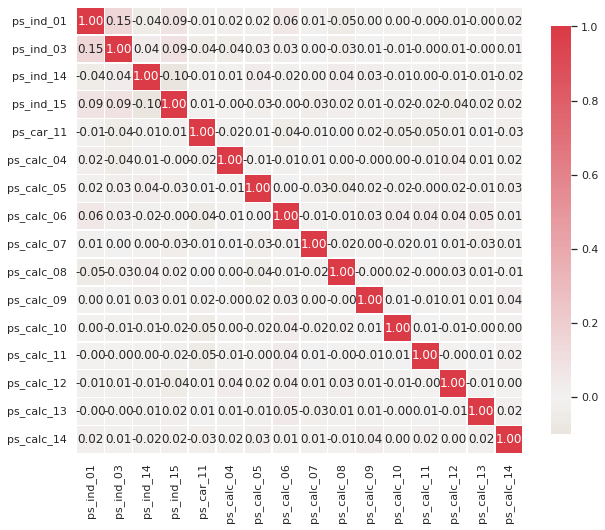

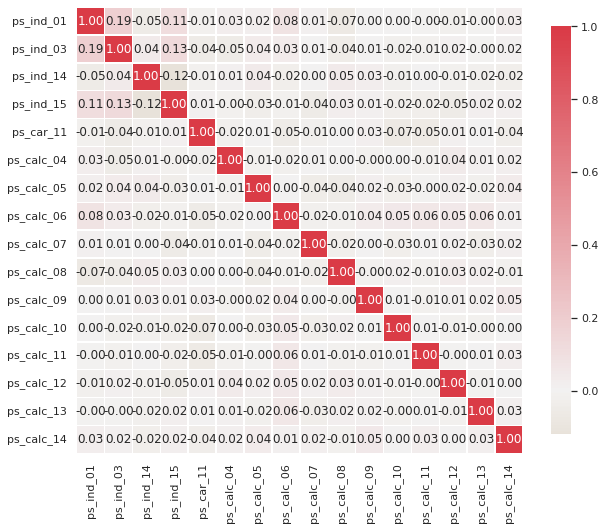

In [88]:
corr_heatmap1(sample, 'kendall')
corr_heatmap1(sample, 'spearman')

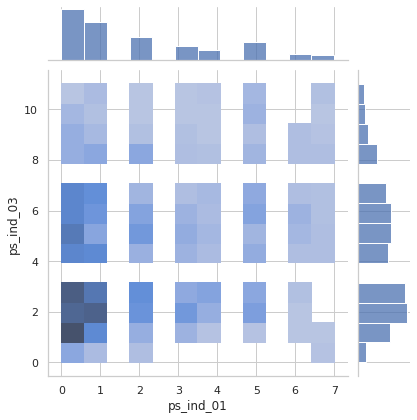

In [89]:
sns.jointplot(x='ps_ind_01', y='ps_ind_03', data=sample, kind="hist")
plt.show()

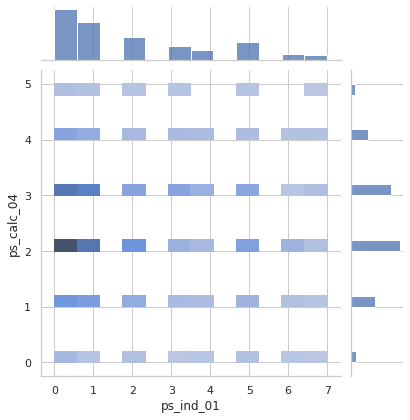

In [90]:
sns.jointplot(x='ps_ind_01', y='ps_calc_04', data=sample, kind="hist")
plt.show()

Let's visualise the probabilities of the possible values for a variable using Probability Mass Function (PMF). PMF requires empiricaldist package. If not available, you may tnstall empiricaldist using the following command line: <br>
!pip install empiricaldist

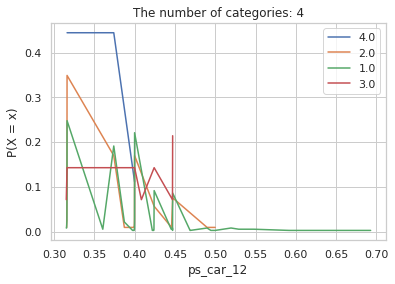

In [91]:
from empiricaldist import Cdf, Pmf
train_pmf = train.sample(n = 500)
fig, ax = plt.subplots()
# Extract the unique categories
categories = train_pmf['ps_ind_02_cat'].unique()
for cat in categories:
    pmf_cat = Pmf.from_seq(train_pmf[
        train_pmf['ps_ind_02_cat'] == cat]['ps_car_12'])
    ax.plot(pmf_cat, label=cat)
ax.set(xlabel='ps_car_12',
       ylabel='P(X = x)')
plt.title('The number of categories: {}'.format(len(categories)))
ax.legend()
plt.show();

Let's visualise the distribution between 2 specific features The ‘boxenplot’ is a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails. 

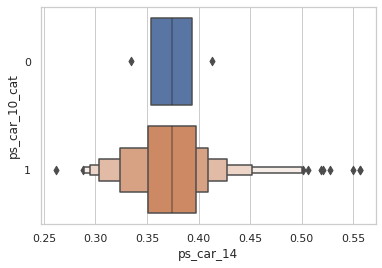

In [92]:
sns.boxenplot(x=train_pmf.ps_car_14.astype('float'), 
              y=train_pmf.ps_car_10_cat.astype('category'))

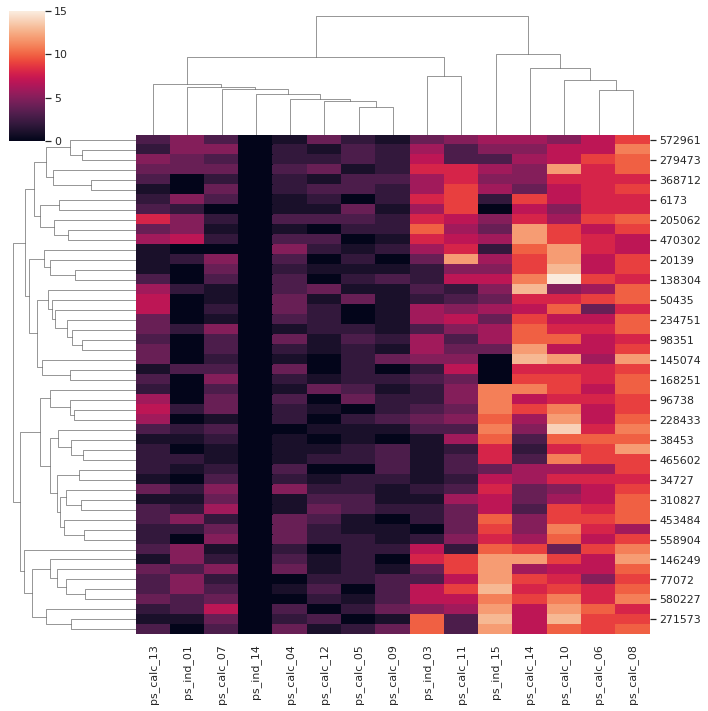

In [93]:
train_clustermap = train.sample(n = 50)
int_features = train_clustermap.select_dtypes(include=['int64']).columns.tolist()
ordinal_features = [o for o in int_features if 
                    ('cat' not in o and 'bin' not in o and 'id' not in o and 'target' not in o )]
ord_features_df = train_clustermap[ordinal_features]
sns.clustermap(ord_features_df)

## Conclusion
I hope  this notebook helped you learn the exploratory data analysis (EDA) workflow, that is an important initial steps before proceeding to the data preprocessing for the ML model development.